In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD',
    'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL',
    'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'BRTX', 'BTTR', 'BYRN', 'CENN', 'CGAU', 'CHEF',
    'CIZN', 'COOP', 'CTGO', 'CVE', 'DQ', 'DTST', 'DYAI', 'EP', 'FCUV',
    'FKWL', 'GGE', 'GME', 'HBM', 'HNRG', 'IDR', 'INTZ',  'KREF',
    'MCVT', 'MIY', 'MNMD', 'MOBQ', 'NAN', 'OMQS', 'PACB', 'PETV',
    'POWW', 'PRPH', 'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS',
    'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'ABST', 'AGI', 'APT', 'BCTF', 'CEF', 'CZFS', 'DGX', 'ESOA',
    'FCN', 'FNV', 'FSI', 'GCBC', 'HMY', 'LFMD', 'MICS', 'MRTI',
    'MTA', 'NEN', 'UTMD', 'YORW']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-12-10', datetime.date(2022, 12, 10))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  153 of 153 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRK... AMZN... ANET... APT... ASML... AXON... BCTF... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CTGO... CVE... CZFS... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... EP... ESOA... ETSY... FCN... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MIY... MNMD... MNST... MOBQ... MRTI... MSFT... MTA... MTCH... NAN... NEN... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... RMD... ROKU... RVLV... RVP

In [5]:
data['Date'].tail()

2514   2022-12-05
2515   2022-12-06
2516   2022-12-07
2517   2022-12-08
2518   2022-12-09
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.006549
2       1.000448
3       0.993679
4       0.995865
5       1.011871
          ...   
2514    0.982106
2515    0.985601
2516    0.998138
2517    1.007522
2518    0.992650
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.015488
2,1.009579
3,1.000200
4,1.006932
5,1.017521
...,...
2514,0.987832
2515,0.997354
2516,1.008325
2517,1.023453


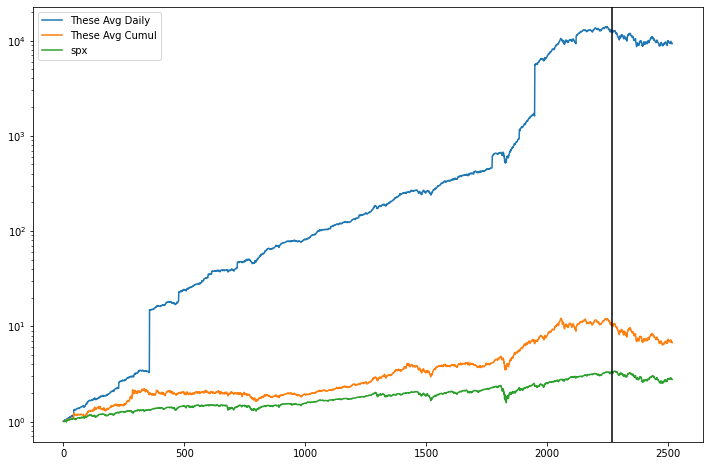

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-12-10,NaN,NaN
1,2012-12-11,1.008856,1.008856
2,2012-12-12,1.014837,1.015258
3,2012-12-13,1.008644,1.008268
4,2012-12-14,1.024077,1.013911


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-12-05,9509.921618,6.949594
2515,2022-12-06,9298.195162,6.789657
2516,2022-12-07,9297.053142,6.795579
2517,2022-12-08,9404.940084,6.861671
2518,2022-12-09,9295.108883,6.723333


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

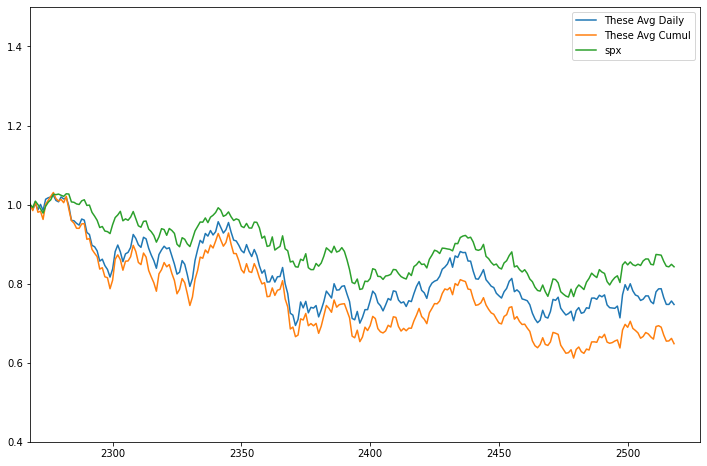

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,59.009998,59.009998,59.080002,57.720001,58.230000,4.077707,1.013395,0.971038,0.958203
2460,59.750000,59.750000,59.759998,56.860001,57.279999,4.090169,1.043122,1.012540,0.970683
2461,57.439999,57.439999,59.529999,57.200001,58.650002,4.050741,0.979369,0.961339,0.981590
2462,57.040001,57.040001,59.200001,56.560001,56.889999,4.043753,1.002637,0.993036,0.990425
2463,54.980000,54.980000,57.259998,54.279999,56.410000,4.006969,0.974650,0.963885,0.988955


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,59.009998,59.009998,59.080002,57.720001
2460,59.750000,59.750000,59.759998,56.860001
2461,57.439999,57.439999,59.529999,57.200001
2462,57.040001,57.040001,59.200001,56.560001
2463,54.980000,54.980000,57.259998,54.279999


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,59.009998,59.009998,59.080002,57.720001,59.759998,56.860001,1.012710,0.963566
2460,59.750000,59.750000,59.759998,56.860001,59.529999,57.200001,0.996318,0.957322
2461,57.439999,57.439999,59.529999,57.200001,59.200001,56.560001,1.030641,0.984680
2462,57.040001,57.040001,59.200001,56.560001,57.259998,54.279999,1.003857,0.951613
2463,54.980000,54.980000,57.259998,54.279999,53.860001,52.380001,0.979629,0.952710


0.05    0.977712
Name: HighMult, dtype: float64


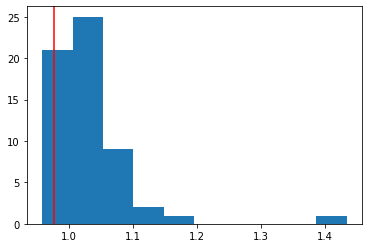

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0317056125738366


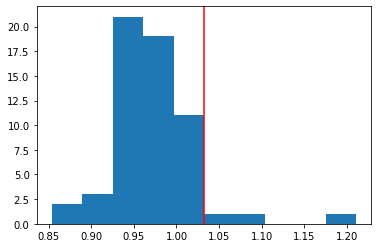

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0317056125738366, 0.9777122957569568)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9854154442272787)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,59.009998,59.009998,59.080002,57.720001,59.759998,56.860001,1.012710,0.963566,0
2460,59.750000,59.750000,59.759998,56.860001,59.529999,57.200001,0.996318,0.957322,1
2461,57.439999,57.439999,59.529999,57.200001,59.200001,56.560001,1.030641,0.984680,0
2462,57.040001,57.040001,59.200001,56.560001,57.259998,54.279999,1.003857,0.951613,0
2463,54.980000,54.980000,57.259998,54.279999,53.860001,52.380001,0.979629,0.952710,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0061354092305526, 0.9890422086977401, 1.055772167595529, 0.9750938318450764)

In [27]:
get_hilo_mults(aapl)

(0.9980856370938684, 0.9901630242668259, 1.016897293193346, 0.9843335321959812)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,0.998086,0.990163,1.016897,0.984334
1,ABMD,1.002081,0.997250,1.008785,0.999240
2,ABNB,0.993075,0.982257,1.021330,0.987875
3,ABST,1.006589,0.996618,1.001060,0.995763
4,ACN,1.001039,0.989950,1.019369,0.996921


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,142.160004,AAPL
ABMD,380.75,ABMD
ABNB,94.699997,ABNB
ABST,9.33,ABST
ACN,288.410004,ACN
...,...,...
ZM,72.160004,ZM
ZYXI,13.34,ZYXI
^GSPC,3934.379883,^GSPC
^IXIC,11004.617188,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,0.998086,0.990163,1.016897,0.984334,142.160004
1,ABMD,1.002081,0.997250,1.008785,0.999240,380.75
2,ABNB,0.993075,0.982257,1.021330,0.987875,94.699997
3,ABST,1.006589,0.996618,1.001060,0.995763,9.33
4,ACN,1.001039,0.989950,1.019369,0.996921,288.410004


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv